# Image Enhancement: Point Operations

In [1]:
%matplotlib inline

import numpy as np

import matplotlib.image as img
import matplotlib.pyplot as plt

from skimage import io
from skimage import exposure
from skimage.util import random_noise
from skimage.util import img_as_float32 as img_as_float

In [2]:
def print_imginfo(I):
    print(type(I))
    print(I.shape, I.dtype)
    print('Data range:', np.min(I), 'to', np.max(I))

In [3]:
def show_imghist(I):
    fig, ax = plt.subplots(1, 2, figsize=(10,3))
    
    ax[0].imshow(I, cmap='gray', vmin=-0.1, vmax=1.1)
    ax[0].set_axis_off()
    
    ax[1].hist(I.ravel(), lw=0, bins=256, range=(-0.99,0.99));
    ax[1].set_xlim(-1,1)
    ax[1].set_yticks([])

<class 'numpy.ndarray'>
(275, 183) float32
Data range: 0.1296796 to 0.99212784

<class 'numpy.ndarray'>
(275, 183) float32
Data range: -1.1765963 to 2.0038338


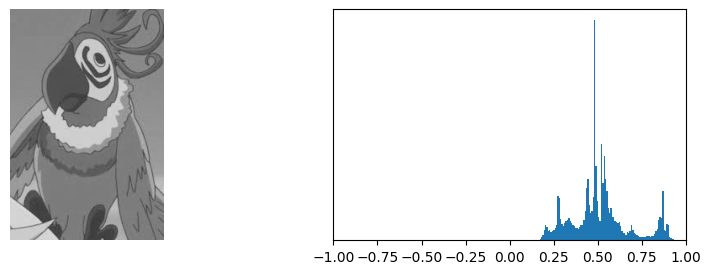

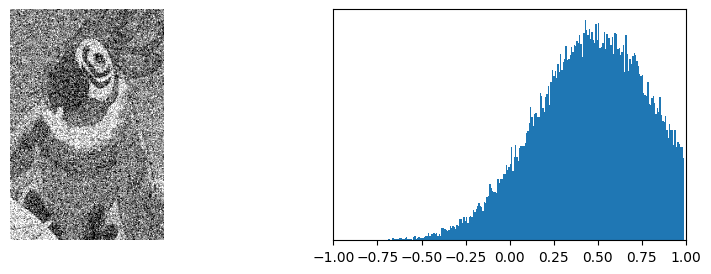

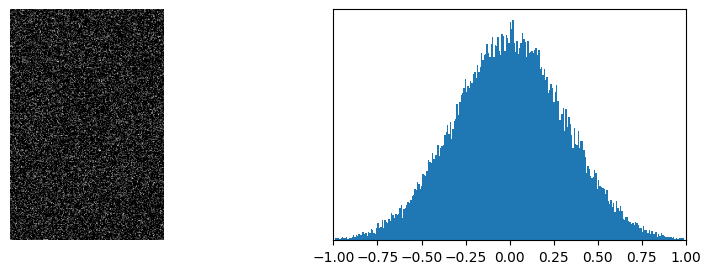

In [4]:
I1 = io.imread("./parrot.jpeg", as_gray=True)
I1 = img_as_float(I1)

noise_mean = 0.0
noise_var = 0.10

I2 = random_noise(I1, mode='gaussian', clip=False, mean=noise_mean, var=noise_var)
I2 = img_as_float(I2)

print_imginfo(I1)
print('')
print_imginfo(I2)

show_imghist(I1)
show_imghist(I2)
show_imghist(I2-I1)

## Arithmetic Operations: Averaging

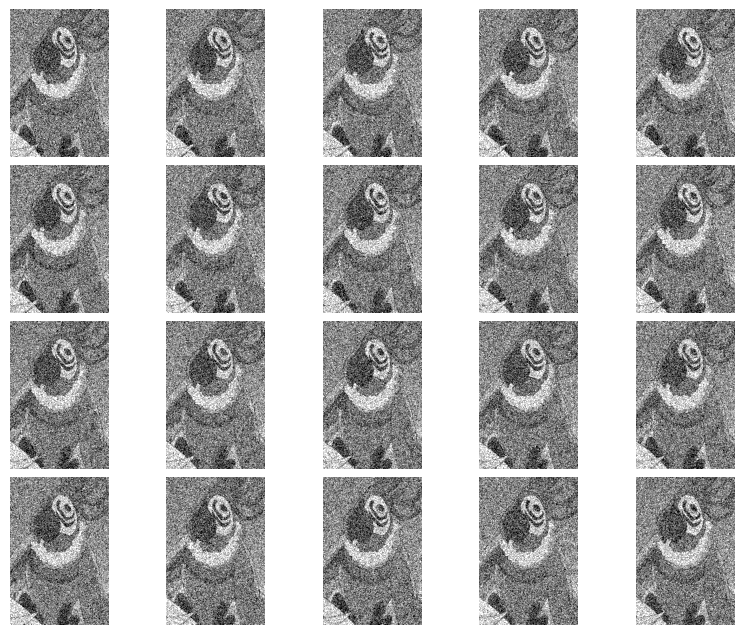

In [5]:
fig = plt.figure(figsize=(10,8))

Ix = []
for i in range(1,21):
    I2 = random_noise(I1, mode='gaussian', clip=False, mean=noise_mean, var=noise_var)
    Ix.append(I2)
    plt.subplot(4,5,i)
    plt.imshow(I2, cmap='gray', vmin=-0.1, vmax=1.1)
    plt.axis('off')  
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()

 N=1 mean=-0.0007 var=0.100
 N=2 mean=-0.0007 var=0.050
 N=3 mean=-0.0000 var=0.033
 N=4 mean=-0.0008 var=0.025
 N=5 mean=-0.0011 var=0.020
 N=6 mean=-0.0013 var=0.017
 N=7 mean=-0.0009 var=0.014
 N=8 mean=-0.0010 var=0.012
 N=9 mean=-0.0010 var=0.011
 N=10 mean=-0.0007 var=0.010
 N=11 mean=-0.0008 var=0.009
 N=12 mean=-0.0006 var=0.008
 N=13 mean=-0.0005 var=0.008
 N=14 mean=-0.0006 var=0.007
 N=15 mean=-0.0006 var=0.007
 N=16 mean=-0.0005 var=0.006
 N=17 mean=-0.0005 var=0.006
 N=18 mean=-0.0005 var=0.006
 N=19 mean=-0.0005 var=0.005
 N=20 mean=-0.0005 var=0.005


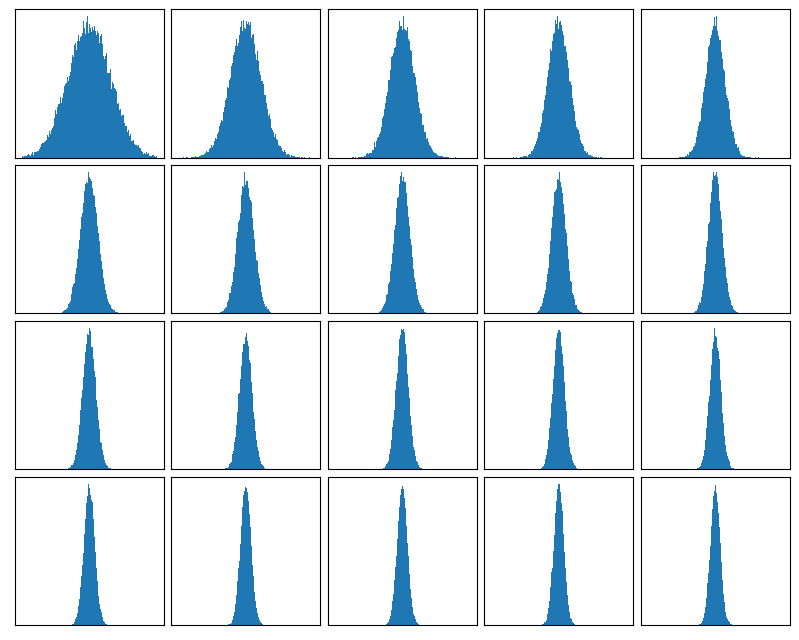

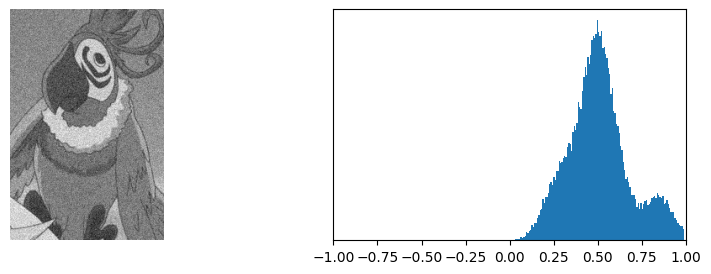

In [6]:
fig = plt.figure(figsize=(10,8))

for i in range(1,21):
    I2 = np.mean(Ix[:i], axis=0) - I1
    plt.subplot(4,5,i)
    plt.hist(I2.ravel(), lw=0, bins=256, range=(-0.99,0.99))
    print(' N=%d mean=%.4f var=%.3f' % (i, np.mean(I2), np.var(I2)))
    plt.xticks([])
    plt.yticks([])
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()

show_imghist(np.mean(Ix, axis=0))